<a href="https://colab.research.google.com/github/asif79941/projects/blob/colab/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/Default_Fin.csv")
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [6]:
data.drop("Index",inplace=True,axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [11]:
data.isnull().sum()

,0
Employed,0
Bank Balance,0
Annual Salary,0
Defaulted?,0


In [12]:
data.describe()

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [13]:
table = data['Defaulted?'].value_counts().reset_index()
table.columns = ['Status', 'Number']
table['Status'] = table['Status'].map({1 :'Defaulted', 0 :'Not defaulted'})
table

,Status,Number
0,Not defaulted,9667
1,Defaulted,333


In [14]:
table = data['Employed'].value_counts().reset_index()
table.columns = ['Status', 'Number']
table['Status'] = table['Status'].map({1 :'Employed', 0 :'Unemployed'})
table

,Status,Number
0,Employed,7056
1,Unemployed,2944


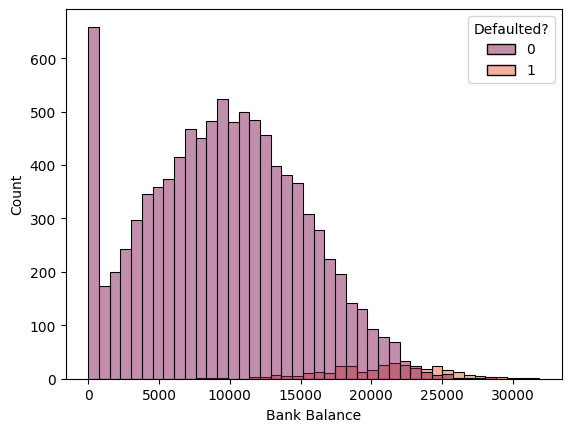

In [16]:
sns.histplot(data=data, x="Bank Balance", hue="Defaulted?",palette="rocket")
plt.show()

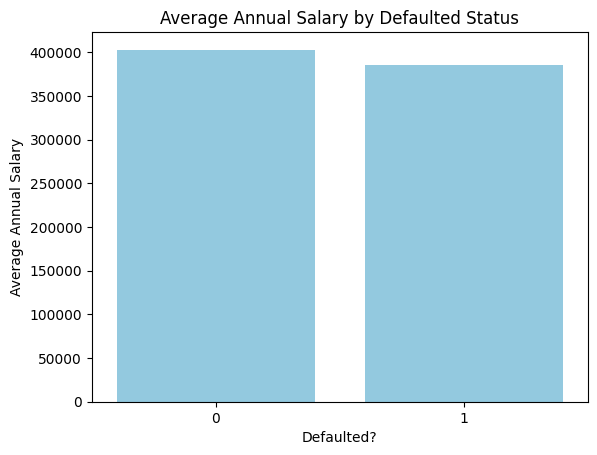

In [33]:
avg_salary = data.groupby('Defaulted?')['Annual Salary'].mean().reset_index()
sns.barplot(x='Defaulted?', y='Annual Salary', data=avg_salary,color="skyblue")
plt.title('Average Annual Salary by Defaulted Status')
plt.xlabel('Defaulted?')
plt.ylabel('Average Annual Salary')
plt.show()

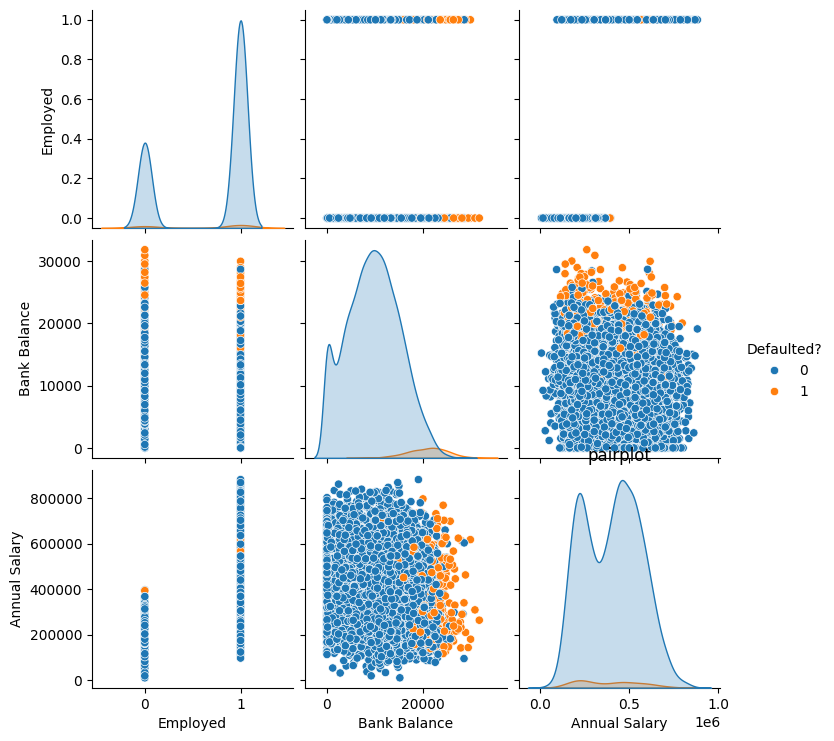

In [23]:
sns.pairplot(data,hue="Defaulted?")
plt.title("pairplot")
plt.show()

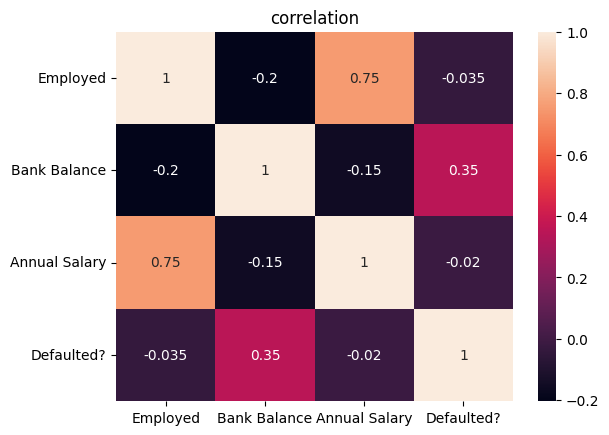

In [25]:
sns.heatmap(data.corr(),annot=True,cmap="rocket")
plt.title("correlation")
plt.show()

In [26]:
x=data.drop("Defaulted?",axis=1)
y=data["Defaulted?"]

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
scaler=StandardScaler()
x=scaler.fit_transform(x)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [31]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9695
[[1920   11]
 [  50   19]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



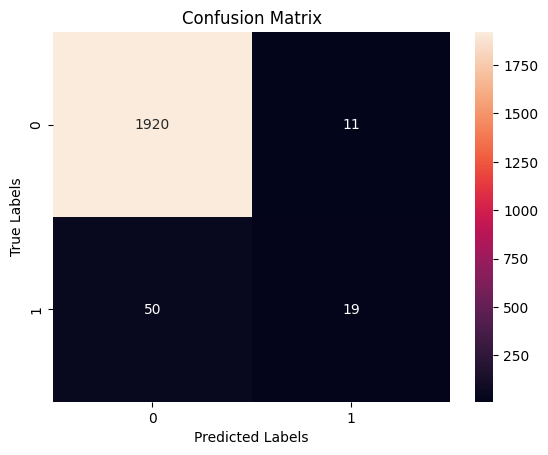

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [40]:
def predict_default(Employed,BankBalance,AnnualSalary):
  default=model.predict(scaler.transform([[Employed,BankBalance,AnnualSalary]]))
  if default==1:
    return "Defaulted"
  else:
    return "Not Defaulted"
print(predict_default(1,23000,45000))

Not Defaulted


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
